In [13]:
import numpy as np
from tensorflow.keras.datasets import imdb

In [3]:
(X_train_all,y_train_all),(X_test,y_test) = imdb.load_data(skip_top=20,num_words=100)

In [6]:
X_train_all.shape,y_train_all.shape

((25000,), (25000,))

In [7]:
print(X_train_all)

[list([2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32])
 list([2, 2, 2, 2, 2, 78, 2, 2, 2, 2, 2, 2, 2, 26, 2, 2, 2, 2, 2, 2, 2, 20, 2, 2, 2, 2, 2, 2, 2, 2, 2, 21, 2, 69, 2, 2, 30, 23, 2, 2, 2, 2, 93, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 89, 29, 2, 46, 37, 2, 2, 2, 45, 43, 38, 2, 2, 2, 2, 2

In [9]:
for i in range(len(X_train_all)):
  X_train_all[i] = [w for w in X_train_all[i] if w > 2]

print(X_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [10]:
word_to_index = imdb.get_word_index()
word_to_index['movie']

1654784/1641221 [==============================] - 0s 0us/step


17

In [11]:
index_to_word = {word_to_index[k] : k for k in word_to_index}
for w in X_train_all[0]:
  print(index_to_word[w-3],end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [14]:
np.random.seed(42)
random_index = np.random.permutation(25000)
X_train = X_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = X_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]


In [16]:
from tensorflow.keras.preprocessing import sequence

maxlen = 100
X_train_seq = sequence.pad_sequences(X_train,maxlen=maxlen)
X_val_seq = sequence.pad_sequences(x_val,maxlen=maxlen)

In [17]:
from tensorflow.keras.utils import to_categorical

X_train_onehot = to_categorical(X_train_seq)
X_val_onehot = to_categorical(X_val_seq)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

model = Sequential()
model.add(SimpleRNN(32,input_shape = (100,100)))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer="sgd",loss = "binary_crossentropy",metrics=['accuracy'])
history = model.fit(X_train_onehot,y_train,batch_size=32,validation_data=(X_val_onehot,y_val),epochs=20)

Epoch 1/20
625/625 [==============================] - 11s 16ms/step - loss: 0.6939 - accuracy: 0.5202 - val_loss: 0.6948 - val_accuracy: 0.5202
Epoch 2/20
625/625 [==============================] - 10s 16ms/step - loss: 0.6871 - accuracy: 0.5418 - val_loss: 0.6884 - val_accuracy: 0.5384
Epoch 3/20
625/625 [==============================] - 10s 16ms/step - loss: 0.6682 - accuracy: 0.5809 - val_loss: 0.6545 - val_accuracy: 0.6138
Epoch 4/20
625/625 [==============================] - 10s 16ms/step - loss: 0.6405 - accuracy: 0.6335 - val_loss: 0.6273 - val_accuracy: 0.6520
Epoch 5/20
625/625 [==============================] - 10s 16ms/step - loss: 0.6275 - accuracy: 0.6499 - val_loss: 0.6279 - val_accuracy: 0.6456
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 0.6124 - accuracy: 0.6701 - val_loss: 0.5925 - val_accuracy: 0.6890
Epoch 7/20
625/625 [==============================] - 10s 16ms/step - loss: 0.6023 - accuracy: 0.6765 - val_loss: 0.6001 - val_accuracy:

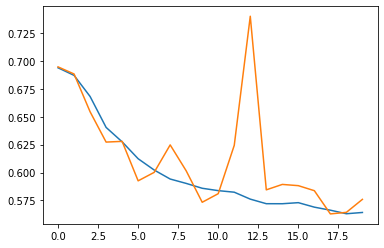

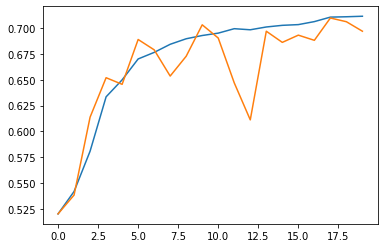

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [30]:
from tensorflow.keras.layers import Embedding
(X_train_all,y_train_all),(X_test,y_test) = imdb.load_data(skip_top=20,num_words=1000)
for i in range(len(X_train_all)):
  X_train_all[i] = [w for w in X_train_all[i] if w > 2]
X_train = X_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = X_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]
maxlen = 100
X_train_seq = sequence.pad_sequences(X_train,maxlen=maxlen)
X_val_seq = sequence.pad_sequences(x_val,maxlen=maxlen)

X_train_seq.shape

(20000, 100)

In [31]:
model_ebd = Sequential()
model_ebd.add(Embedding(1000,32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1,activation="sigmoid"))
model_ebd.compile(optimizer='adam',loss="binary_crossentropy",metrics = ["accuracy"])
history = model_ebd.fit(X_train_seq,y_train,batch_size=32,validation_data=(X_val_seq,y_val),epochs=20)

Epoch 1/20
625/625 [==============================] - 12s 18ms/step - loss: 0.5517 - accuracy: 0.7061 - val_loss: 0.4594 - val_accuracy: 0.7938
Epoch 2/20
625/625 [==============================] - 11s 17ms/step - loss: 0.4289 - accuracy: 0.8152 - val_loss: 0.4427 - val_accuracy: 0.8034
Epoch 3/20
625/625 [==============================] - 11s 17ms/step - loss: 0.3752 - accuracy: 0.8430 - val_loss: 0.4220 - val_accuracy: 0.8138
Epoch 4/20
625/625 [==============================] - 11s 17ms/step - loss: 0.3297 - accuracy: 0.8655 - val_loss: 0.4219 - val_accuracy: 0.8078
Epoch 5/20
625/625 [==============================] - 11s 17ms/step - loss: 0.3001 - accuracy: 0.8813 - val_loss: 0.4079 - val_accuracy: 0.8214
Epoch 6/20
625/625 [==============================] - 11s 17ms/step - loss: 0.2760 - accuracy: 0.8913 - val_loss: 0.4259 - val_accuracy: 0.8088
Epoch 7/20
625/625 [==============================] - 11s 18ms/step - loss: 0.2522 - accuracy: 0.9028 - val_loss: 0.4427 - val_accuracy:

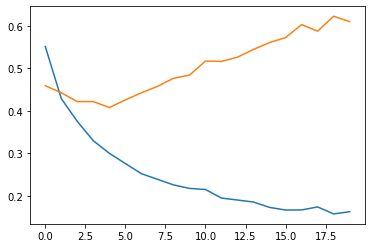

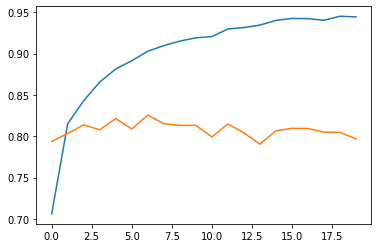

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [33]:
from tensorflow.keras.layers import LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(1000,32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1,activation='sigmoid'))
model_lstm.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_lstm.compile(optimizer='adam',loss="binary_crossentropy",metrics = ["accuracy"])
history = model_lstm.fit(X_train_seq,y_train,batch_size=32,validation_data=(X_val_seq,y_val),epochs=20)

Epoch 1/20
625/625 [==============================] - 17s 25ms/step - loss: 0.4381 - accuracy: 0.7975 - val_loss: 0.3725 - val_accuracy: 0.8394
Epoch 2/20
625/625 [==============================] - 15s 24ms/step - loss: 0.3287 - accuracy: 0.8607 - val_loss: 0.3553 - val_accuracy: 0.8408
Epoch 3/20
625/625 [==============================] - 15s 24ms/step - loss: 0.3076 - accuracy: 0.8709 - val_loss: 0.3564 - val_accuracy: 0.8452
Epoch 4/20
625/625 [==============================] - 15s 24ms/step - loss: 0.2889 - accuracy: 0.8788 - val_loss: 0.3627 - val_accuracy: 0.8420
Epoch 5/20
625/625 [==============================] - 15s 24ms/step - loss: 0.2762 - accuracy: 0.8864 - val_loss: 0.3881 - val_accuracy: 0.8370
Epoch 6/20
625/625 [==============================] - 15s 24ms/step - loss: 0.2691 - accuracy: 0.8867 - val_loss: 0.3904 - val_accuracy: 0.8304
Epoch 7/20
625/625 [==============================] - 15s 24ms/step - loss: 0.2533 - accuracy: 0.8954 - val_loss: 0.3916 - val_accuracy: